In [3]:
from hossam import load_data
from pandas import crosstab
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [4]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data('privacy')
origin

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2
5,6,여,3
6,7,남,2
7,8,여,2
8,9,여,1
9,10,남,1


In [8]:
df = origin.astype({'성별':'category', '메모종류': 'category'})
df.head()

,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [10]:
cb = crosstab(index=df['성별'], columns=df['메모종류'], normalize=True)
cb

메모종류,1,2,3
성별,,,
남,0.066667,0.133333,0.066667
여,0.133333,0.533333,0.066667


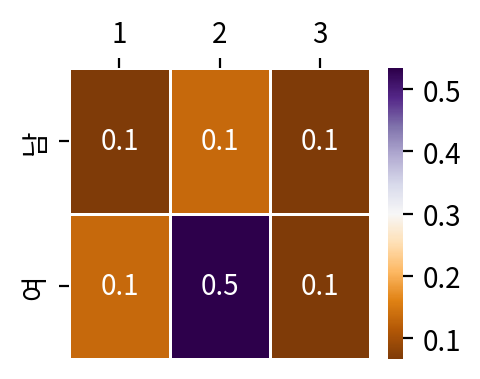

In [11]:
width_px = 500
height_px = 400
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.heatmap(data=cb, annot=True, fmt="0.1f", linewidth=0.5,cmap="PuOr")


ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()
plt.close()